In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
uncerts = []
errs = []

for sens_attr in ["race", "sex"]:
    for dataset in ["adult", "compas", "german"]:
        for mechanism in ["laplace", "exp"]:
            print(f"{dataset}-{sens_attr}-{mechanism}_errs")
            print(f"{dataset}-{sens_attr}-{mechanism}_uncert")
            
            with open(f"resultatenarrayspafer/{dataset}-{sens_attr}-{mechanism}_uncert", 'rb') as f:
                uncerts.append(np.load(f))
                
            with open(f"resultatenarrayspafer/{dataset}-{sens_attr}-{mechanism}_errs", 'rb') as f:
                errs.append(np.load(f))
                
                

# with open("resultatenarrayspafer/compas-race-exp_uncert", 'rb') as f:
#     compas_race_exp_uncert = uncerts.append(np.load(f))

adult-race-laplace_errs
adult-race-laplace_uncert
adult-race-exp_errs
adult-race-exp_uncert
compas-race-laplace_errs
compas-race-laplace_uncert
compas-race-exp_errs
compas-race-exp_uncert
german-race-laplace_errs
german-race-laplace_uncert
german-race-exp_errs
german-race-exp_uncert
adult-sex-laplace_errs
adult-sex-laplace_uncert
adult-sex-exp_errs
adult-sex-exp_uncert
compas-sex-laplace_errs
compas-sex-laplace_uncert
compas-sex-exp_errs
compas-sex-exp_uncert
german-sex-laplace_errs
german-sex-laplace_uncert
german-sex-exp_errs
german-sex-exp_uncert


In [20]:
for err in errs:
    print(len(err))

40
40
40
40
40
40
40
40
40
40
40
40


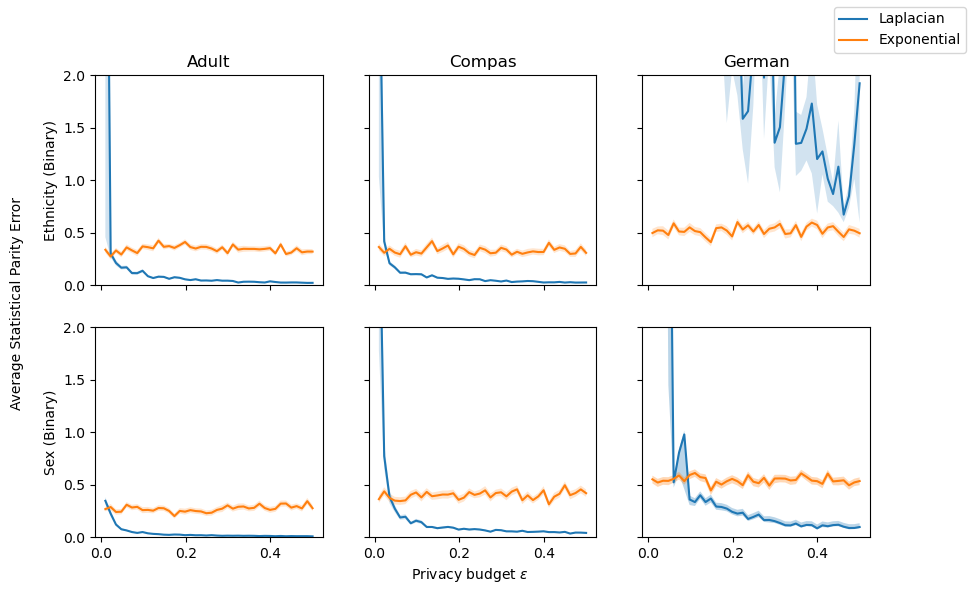

In [21]:
# Create a figure with 6 subplots in a 2x3 grid
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 6))
epsilons = np.linspace(0.01, 0.5, 40)

# Plot random data on each subplot
axs_idxs = [num//2 for num in range(10)]
for err, uncert, ax in zip(errs, uncerts, axs_idxs):
    axs.flat[ax].plot(epsilons, err)
    axs.flat[ax].fill_between(epsilons, err + uncert, err - uncert, alpha=0.2)
    axs.flat[ax].set_ylim(0, 2)

axs.flat[0].set_title("Adult")
axs.flat[1].set_title("Compas")
axs.flat[2].set_title("German")
axs.flat[0].set_ylabel("Ethnicity (Binary)")
axs.flat[3].set_ylabel("Sex (Binary)")
axs.flat[5].plot(epsilons, errs[-2], label="Laplacian")
axs.flat[5].plot(epsilons, errs[-1], label="Exponential")
axs.flat[5].fill_between(epsilons, errs[-2] + uncert[-2], errs[-2] - uncerts[-2], alpha=0.3)
axs.flat[5].fill_between(epsilons, errs[-1] + uncert[-1], errs[-1] - uncerts[-1], alpha=0.3)
    
# Set common labels for x and y axes
fig.text(0.5, 0.04, 'Privacy budget $\epsilon$', ha='center')
fig.text(0.04, 0.5, 'Average Statistical Parity Error', va='center', rotation='vertical')
fig.legend()

# Show the plot
plt.savefig("rsq0.png", dpi=800)
plt.show()


In [22]:
with open(f"german-sex-exp_uncert", 'rb') as f:
    compas_race_exp_uncert = np.load(f)
    
with open(f"german-sex-exp_errs", 'rb') as f:
    compas_race_exp_errs = np.load(f)

with open(f"german-sex-laplace_uncert", 'rb') as f:
    compas_race_laplace_uncert = np.load(f)

with open(f"german-sex-laplace_errs", 'rb') as f:
    compas_race_laplace_errs = np.load(f)

plt.plot(epsilons, compas_race_laplace_errs)
plt.plot(epsilons, compas_race_exp_errs)
plt.ylim(0,2)
# plt.fill_between()

FileNotFoundError: [Errno 2] No such file or directory: 'german-sex-exp_uncert'